#### Ejercicio 1

##### Parte a):

>\begin{align}
    \begin{cases}
        \dot{x} &= 3x - xy \\
        \dot{y} &= y + \log(y)
    \end{cases}
\end{align}
>
>La siguiente celda, al correr, debería mostrar la solución general de este sistema, utilizando la librería sympy:

In [48]:
import sympy as sp
from IPython.display import display

t = sp.Symbol('t', positive=True, real=True)
x = sp.Function('x', real=True)
y = sp.Function('y', real=True, positive=True)

eq1 = sp.Eq(x(t).diff(t), 3*x(t) - x(t)*y(t))
eq2 = sp.Eq(y(t).diff(t), y(t) + sp.log(y(t)))

x_sol, y_sol = sp.dsolve([eq1, eq2], [x(t), y(t)], hint="best_hint")

display(x_sol)
display(y_sol)

sp.checkodesol([eq1, eq2], [x_sol, y_sol])

Eq(x(t), exp(C1 + exp(C2 + t) - 3))

Eq(y(t), C1 - log(exp(C1 + exp(C2 + t) - 3)))

(False, [0, -log(3 - exp(C2 + t)) - 3])

> Intento usar la solución dada por sympy cuando especifico las condiciones iniciales. Notemos que falla pero con ganas oye:

Eq(x(t), -5*exp(2*exp(t) - 2))

Eq(y(t), -log(-5*exp(2*exp(t) - 2)) + 1 + log(5) + I*pi)

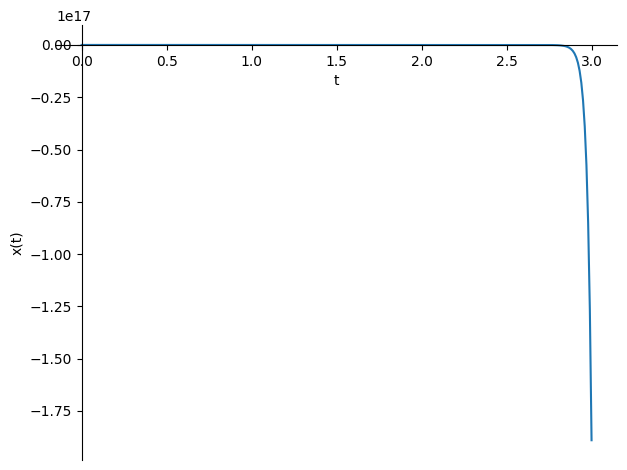

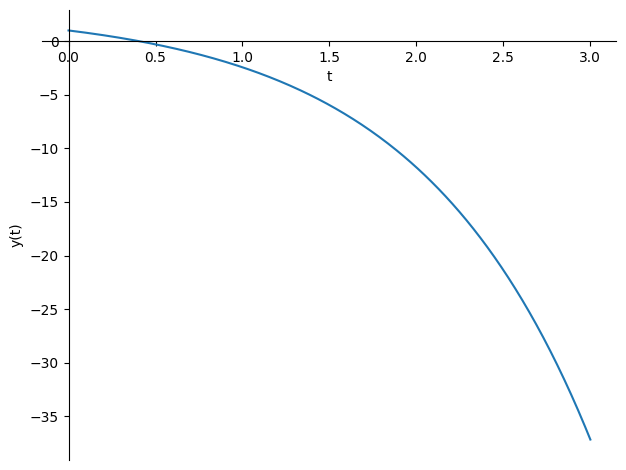

(False, [0, -log(3 - 2*exp(t)) - 3])

In [52]:
import matplotlib.pyplot as plt
import numpy as np

ics = {x(0): -5, y(0): 1}
result = sp.dsolve([eq1, eq2], [x(t), y(t)], ics=ics)

display(result[0])
display(result[1])

sp.plot(result[0].rhs, (t, 0, 3), xlabel='t', ylabel='x(t)', adaptive=False, nb_of_points=300)
sp.plot(result[1].rhs, (t, 0, 3), xlabel='t', ylabel='y(t)', adaptive=False, nb_of_points=300)

sp.checkodesol([eq1, eq2], result)

>Ahora usemos la solución que nos dio sympy inicialmente, considerando a mano las condiciones iniciales. Notemos primero que $e^{C_i}$ puede pensarse siempre como una constante A. Si admitimos $C_i$ complejos, A puede ser cualquier real. Esto nos permite interpretar la fórmula de sympy como:
>
>\begin{align}
    \begin{cases}
        x(t) &= Ae^{Be^t - 3}
 \\
        y(t) &= \log(A) - \log{\left(Ae^{Be^t - 3} \right)}
    \end{cases}
\end{align}
>
>Ahora notamos que $x(0) = -5$ implica $A = -5$. Reescribiendo $y(t)$:
>
>$$
y(t) = 3 - Be^t
>$$
>
>Así, $B = 2$. Ahora si podemos graficar, con esta forma simplificada de $x$ e $y$.

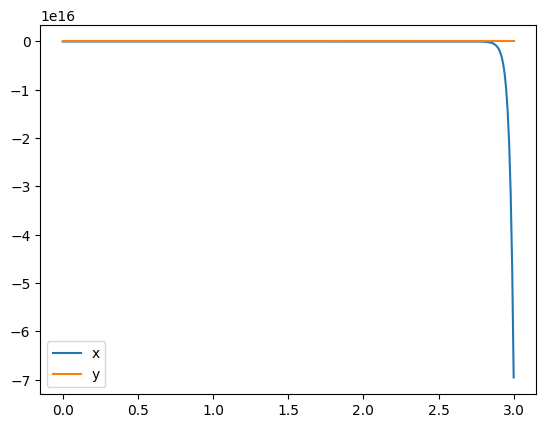

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def x(t):
    return -5*np.exp(2*np.exp(t)-3)

def y(t):
    return 3 - 2*np.exp(t)

t = np.linspace(0, 3, 300)

plt.plot(t, x(t), label='x')
plt.plot(t, y(t), label='y')
plt.legend(loc='best')
plt.show()


##### Parte b):

> Usando solve_ivp de scipy:

C:\Users\Miguel\AppData\Local\Temp\ipykernel_22652\1170112282.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\Miguel\AppData\Local\Temp\ipykernel_22652\1170112282.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


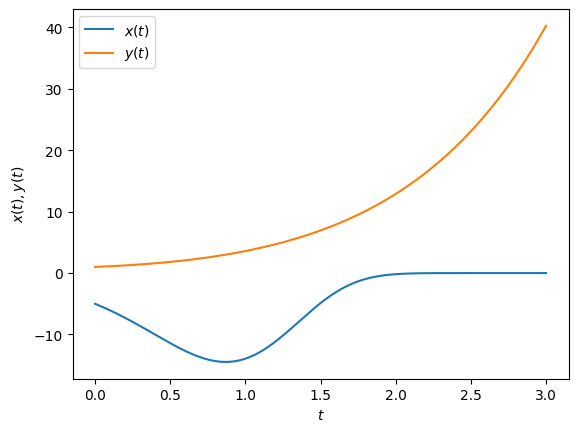

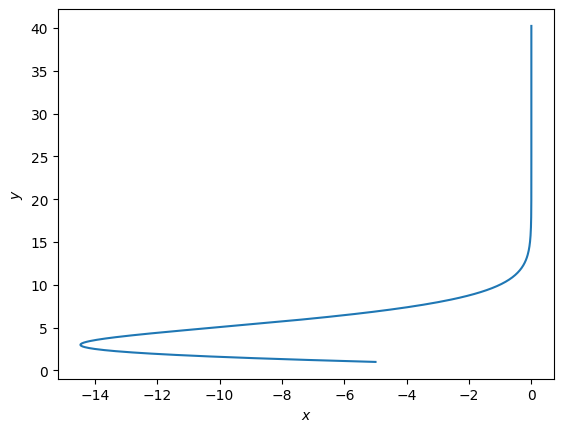

In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(t, y):
    return [3*y[0] - y[0]*y[1], y[1] + np.log(y[1])]

sol = solve_ivp(f, [0, 3], [-5, 1], max_step=0.01)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(sol.t, sol.y[0], label='$x(t)$')
ax1.plot(sol.t, sol.y[1], label='$y(t)$')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x(t), y(t)$')
ax1.legend(loc='best')
fig1.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(sol.y[0], sol.y[1])
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
fig2.show()



